In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 10
M = 20

n1 = np.arange(N)
n2 = np.arange(M)

A1 =2
A2 =3

x = A1 * np.sin(2 * np.pi * n1 / N * 5) + 0.5 * np.random.randn(N)
y = A2 * np.sin(2 * np.pi * n2 / M * 5) + 0.5 * np.random.randn(M)

print(x)
print(y)

[-0.43134881 -0.12404588 -0.05138071  0.74727632 -0.25984314 -0.89563867
 -0.08151152 -0.11206174 -0.07157652  0.43062997]
[ 1.19655892  2.71559853  0.15738504 -2.80917433 -0.05058703  2.94999457
 -0.15398611 -3.41278077 -0.18569331  2.77167959  0.31208509 -3.21660764
 -0.28733745  3.65886349  0.62832311 -3.27603149  0.62369483  4.4207227
  0.24200101 -3.471526  ]


# **Performing Padding**

In [ ]:
padding_x = np.pad(x, (0,M-1));
padding_y = np.pad(y, (0,N-1));

In [ ]:
print(padding_x)
print(padding_y)

[-0.43134881 -0.12404588 -0.05138071  0.74727632 -0.25984314 -0.89563867
 -0.08151152 -0.11206174 -0.07157652  0.43062997  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
[ 1.19655892  2.71559853  0.15738504 -2.80917433 -0.05058703  2.94999457
 -0.15398611 -3.41278077 -0.18569331  2.77167959  0.31208509 -3.21660764
 -0.28733745  3.65886349  0.62832311 -3.27603149  0.62369483  4.4207227
  0.24200101 -3.471526    0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


# DFT AND IDFT FUNCTIONS

In [ ]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
        x[n] /= N
    return x

In [ ]:
X = dft(padding_x)
Y = dft(padding_y)
print(X)
print(Y)


[-0.84950069+0.j         -0.76765487+0.44638437j  0.10382626+0.69636731j
  0.72720341-0.58156031j -0.74719001-1.6377986j  -2.15287   -0.37886839j
 -1.5387053 +1.00901693j -0.74578514+1.18538836j -0.0724041 +1.44730263j
  1.24586684+0.8267129j   1.08162019-1.05092644j -0.67780591-1.32459679j
 -1.02706153-0.13417784j -0.45255005-0.08583271j -0.80629722-0.26683989j
 -0.80629722+0.26683989j -0.45255005+0.08583271j -1.02706153+0.13417784j
 -0.67780591+1.32459679j  1.08162019+1.05092644j  1.24586684-0.8267129j
 -0.0724041 -1.44730263j -0.74578514-1.18538836j -1.5387053 -1.00901693j
 -2.15287   +0.37886839j -0.74719001+1.6377986j   0.72720341+0.58156031j
  0.10382626-0.69636731j -0.76765487-0.44638437j]
[  2.81318276 +0.j           0.84704845 -0.0702282j
   6.82068358 -0.07216652j  -0.038317   +1.45061589j
   2.56335654 -3.8861725j    7.94127952 +2.27626251j
   1.62102293 +5.40955644j  17.28201949-26.66296784j
 -18.6954344  +4.64498785j  -1.00966187 -6.04973227j
   0.78778865 +3.57874091j  -2

In [ ]:
Z = X*Y
print(Z)

[ -2.38980069 +0.j          -0.6188921  +0.4320202j
   0.75842046 +4.74220832j   0.81575636 +1.07717647j
  -8.28008227 -1.29455249j -16.2341385  -7.90919705j
  -7.95261062 -6.68807359j  18.71729827+40.37075004j
  -5.36907701-27.39426753j   3.74348744 -8.3718613j
   4.61308156 +3.0429305j    2.73438476 +2.09623678j
   0.17032597 +2.32335925j  -0.43390854 -0.33098572j
   1.04690768 -1.29608614j   1.04690768 +1.29608614j
  -0.43390854 +0.33098572j   0.17032597 -2.32335925j
   2.73438476 -2.09623678j   4.61308156 -3.0429305j
   3.74348744 +8.3718613j   -5.36907701+27.39426753j
  18.71729827-40.37075004j  -7.95261062 +6.68807359j
 -16.2341385  +7.90919705j  -8.28008227 +1.29455249j
   0.81575636 -1.07717647j   0.75842046 -4.74220832j
  -0.6188921  -0.4320202j ]


In [ ]:
z = idft(Z)
print(np.real(z))

[-0.51613427 -1.3197984  -0.4662267   1.94684182  2.08058545 -2.78156816
 -4.96676703  1.5353685   4.84217394 -1.30122919 -4.14422172  2.12635152
  4.15887083 -1.63550359 -3.99838492  1.46160313  4.00243524 -2.09089902
 -5.01808071  2.09344254  4.66793816 -1.53709011 -4.76951911  0.7601363
  1.13871393  0.20801205  2.27539936  0.35269263 -1.49494315]


In [ ]:
linearConvolution = np.convolve(x,y)

In [ ]:
print(linearConvolution)

[-0.51613427 -1.3197984  -0.4662267   1.94684182  2.08058545 -2.78156816
 -4.96676703  1.5353685   4.84217394 -1.30122919 -4.14422172  2.12635152
  4.15887083 -1.63550359 -3.99838492  1.46160313  4.00243524 -2.09089902
 -5.01808071  2.09344254  4.66793816 -1.53709011 -4.76951911  0.7601363
  1.13871393  0.20801205  2.27539936  0.35269263 -1.49494315]


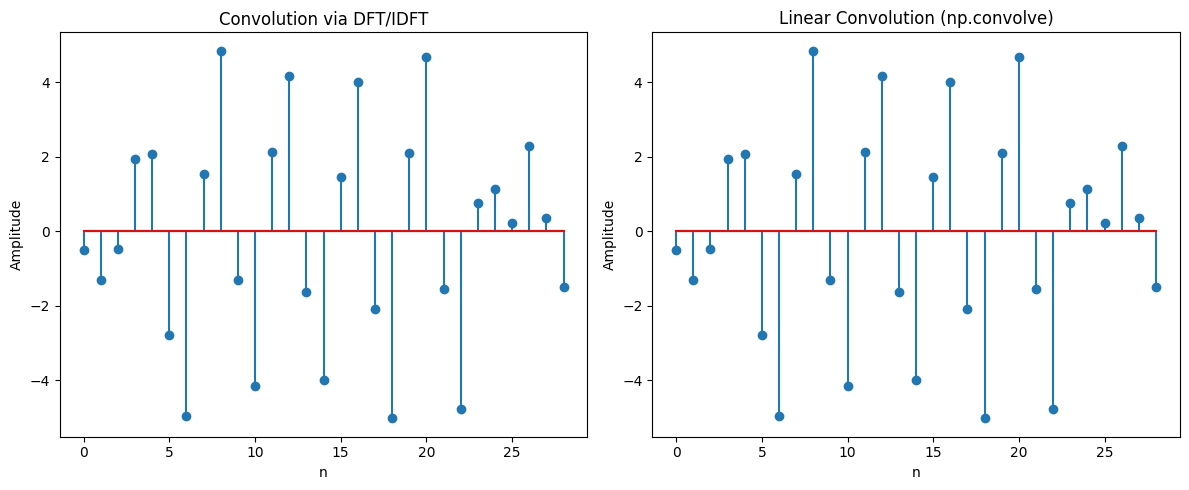

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Convolution via DFT/IDFT')
plt.stem(z.real, basefmt="red")
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title('Linear Convolution (np.convolve)')
plt.stem(linearConvolution, basefmt="red")
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# **Comparing liner vs Dft convolution**

In [ ]:
N = 100
M = 200

n1 = np.arange(N)
n2 = np.arange(M)

A1 =2
A2 =3

x1 = A1 * np.sin(2 * np.pi * n1 / N * 5) + 0.5 * np.random.randn(N)
y1 = A2 * np.sin(2 * np.pi * n2 / M * 5) + 0.5 * np.random.randn(M)

In [ ]:
def linearConvolve(x,y):
    N1 = len(x)
    N2 = len(y)
    N = N1+N2-1
    z = [0] * N


    for n in range(N):
        for k in range(N1):
            if 0 <= n - k < N2:
                z[n] += x[k] * y[n - k]
    return z

In [ ]:
import time

start_time_dft = time.time()
padding_x1 = np.pad(x1, (0,M-1));
padding_y1 = np.pad(y1, (0,N-1));

#X1 = dft(padding_x1)
#Y1 = dft(padding_y1)
X1 = np.fft.fft(padding_x1)
Y1 = np.fft.fft(padding_y1)
Z1= X1*Y1
#z1 = idft(Z1)
z1 = np.fft.ifft(Z1)
end_time_dft = time.time()

start_time_con = time.time()
LinearConvolution = np.convolve(x1,y1)
end_time_con = time.time()

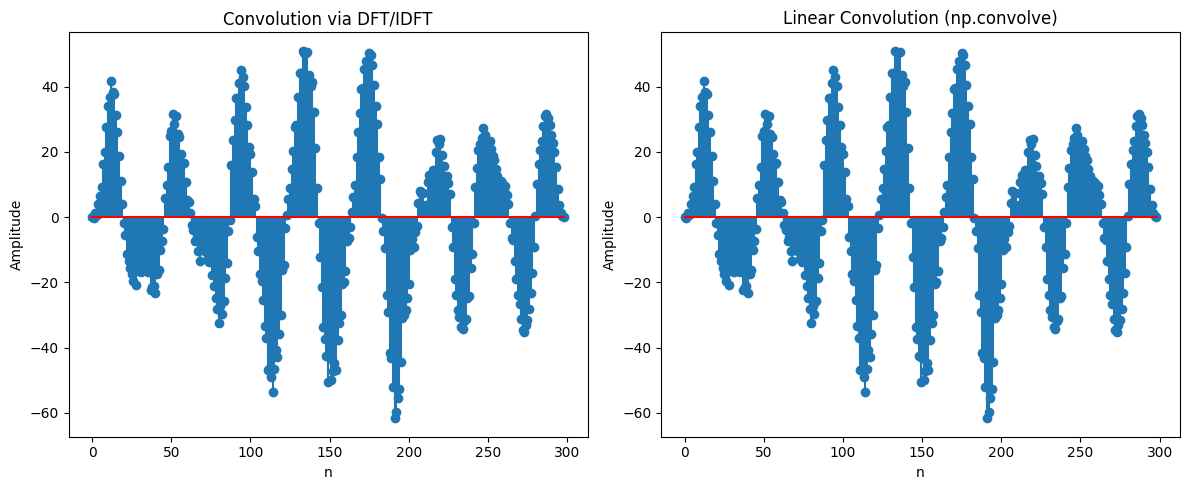

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Convolution via DFT/IDFT')
plt.stem(z1, basefmt="red")
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title('Linear Convolution (np.convolve)')
plt.stem(LinearConvolution, basefmt="red")
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# **Comparing the time it takes in linear and DFT/IDFT Convolution**

In [ ]:
import time

start_time_dft1 = time.time()


X1 = dft(padding_x1)
Y1 = dft(padding_y1)

Z1= X1*Y1
z1 = idft(Z1)
end_time_dft1 = time.time()

start_time_con1 = time.time()
LinearConvolution = linearConvolve(x1,y1)
end_time_con1 = time.time()

In [ ]:
print("Inbuild Function----------------------------------------")
print("Circular Convolve Time:-> ",end_time_dft - start_time_dft);
print("Linear Convolve Time:-> ",end_time_con - start_time_con);
print("Custom Function----------------------------------------")

print("Circular Convolve Time:-> ",end_time_dft1 - start_time_dft1);
print("Linear Convolve Time:-> ",end_time_con1 - start_time_con1);


Inbuild Function----------------------------------------
Circular Convolve Time:->  0.07352304458618164
Linear Convolve Time:->  0.0
Custom Function----------------------------------------
Circular Convolve Time:->  0.253507137298584
Linear Convolve Time:->  0.0


# Checking each array transformations


In [ ]:
x1

array([-0.18419402,  1.09079453,  1.21184791,  1.90609063,  2.84564286,
        1.88652249,  2.71447759,  1.94648736,  1.11138747,  1.30956861,
       -1.43765843, -0.77973405, -1.75175097, -1.3603427 , -1.37824049,
       -1.90553514, -1.63455064, -0.1627949 , -0.40791626, -0.5921751 ,
        1.03847248,  0.97303372,  0.37040939,  1.20563999,  1.95037681,
        1.75380684,  1.9993404 ,  1.64618359,  1.0975738 ,  0.81074919,
       -0.21537728, -1.51614424, -1.61373345, -1.57714397, -2.36552243,
       -2.20589684, -2.36842243, -1.6537022 , -1.36116441, -1.52040105,
       -0.63890287,  0.9340131 ,  0.94532082,  2.23756822,  2.97027401,
        1.62341398,  1.56240692,  0.8813838 ,  1.1107426 ,  0.96689168,
       -0.16091154, -1.16536067, -0.36739013, -1.81562516, -0.86391876,
       -1.7475683 , -1.97194523, -1.71150136, -1.22194948, -0.97428221,
        0.5146712 ,  0.64056687,  1.20884707,  1.85709423,  0.8230314 ,
        1.40060381,  2.17185656,  1.27025009,  1.52377281,  0.51

In [ ]:
X = dft(x1)
print(X)

[ 0.72129635+0.00000000e+00j  5.8783163 -7.69320266e-01j
  3.69749843-4.68495477e+00j -7.22066045+1.11529950e+00j
  1.80156419-1.83681307e-01j  5.49158747-1.02246374e+02j
  5.06735185-5.04371901e+00j  5.5853583 -2.26452059e+00j
 -7.80674799-3.99613973e+00j -5.60260965+6.94930495e-01j
 -1.7007331 -4.72842148e-01j  3.67423199+7.81415729e+00j
  0.40743289-4.47261098e+00j -1.60646521+2.40430400e+00j
  3.41358376+1.95805281e-01j  5.36225847-1.66285654e+00j
  3.67398157+6.28406300e+00j -2.88784868-3.35240244e+00j
  1.30965069+4.28264330e+00j -2.49746595+2.05281760e+00j
 -5.06220199+5.65256099e+00j -0.03975142-4.35579396e-01j
 -2.64047535+3.35065150e+00j -0.7225687 +1.73139017e+00j
  2.57323684+3.43357651e+00j -0.86356966-3.56195974e+00j
 -8.1896063 -1.73660491e+00j -2.379073  -1.26402155e+00j
 -2.65770182-2.04594920e+00j  3.73100404+1.16129787e+00j
  1.86931313-2.43300371e+00j -2.45646532-4.25047420e+00j
 -1.26554479-1.36597527e+00j -1.68486234+3.92229899e+00j
  0.93569217+1.97510058e-01j  5

In [ ]:
X_inc = np.pad(X,(0,20))
X_dec = X[0:90]
print(X_inc)
print(X_dec)


[ 0.72129635+0.00000000e+00j  5.8783163 -7.69320266e-01j
  3.69749843-4.68495477e+00j -7.22066045+1.11529950e+00j
  1.80156419-1.83681307e-01j  5.49158747-1.02246374e+02j
  5.06735185-5.04371901e+00j  5.5853583 -2.26452059e+00j
 -7.80674799-3.99613973e+00j -5.60260965+6.94930495e-01j
 -1.7007331 -4.72842148e-01j  3.67423199+7.81415729e+00j
  0.40743289-4.47261098e+00j -1.60646521+2.40430400e+00j
  3.41358376+1.95805281e-01j  5.36225847-1.66285654e+00j
  3.67398157+6.28406300e+00j -2.88784868-3.35240244e+00j
  1.30965069+4.28264330e+00j -2.49746595+2.05281760e+00j
 -5.06220199+5.65256099e+00j -0.03975142-4.35579396e-01j
 -2.64047535+3.35065150e+00j -0.7225687 +1.73139017e+00j
  2.57323684+3.43357651e+00j -0.86356966-3.56195974e+00j
 -8.1896063 -1.73660491e+00j -2.379073  -1.26402155e+00j
 -2.65770182-2.04594920e+00j  3.73100404+1.16129787e+00j
  1.86931313-2.43300371e+00j -2.45646532-4.25047420e+00j
 -1.26554479-1.36597527e+00j -1.68486234+3.92229899e+00j
  0.93569217+1.97510058e-01j  5

In [ ]:
x_inc = idft(X_inc)
x_dec = idft(X_dec)
print(x_inc.real)
print(x_dec.real)

[-0.15349502  1.41829553  0.85824918  0.0060108  -0.0647757   1.67604992
  1.57210207  1.54090497 -0.08227626  0.0060108   0.88452159  1.75465418
 -1.19804869 -1.01321821 -0.88151222  0.0060108  -0.12293641 -0.76385385
 -1.58794595 -0.70168327  0.49481833  0.0060108  -0.43606809 -0.91422971
  0.86539373  0.89341228  0.27755262  0.0060108  -0.05286806  1.13487447
  1.4615057   1.03860614 -0.08144036  0.0060108   0.90501322  1.31295365
 -0.17948106 -1.73172991 -0.89634411  0.0060108   0.09229669 -1.2863394
 -1.83824737 -1.31507318  0.05389381  0.0060108  -0.77153028 -1.64603133
 -0.53241906  1.4415046   0.88979467  0.0060108   0.01822958  1.85604278
  1.35284498  0.730002   -0.17802816  0.0060108   0.67364094  1.21392088
 -0.13409295 -1.25936496 -0.40103608  0.0060108  -0.21887087 -0.33115465
 -1.45630692 -1.18206067 -0.08843175  0.0060108  -0.78154249 -1.30126254
  0.42889267  0.94362678  0.76751842  0.0060108   0.32821813  0.39231986
  1.16716984  1.31083103 -0.07683511  0.0060108   0.